# AES Variation in Key Schedule

### Importing Dependency

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from aes128 import AES as AES_128
from aes192 import AES as AES_192
from aes256 import AES as AES_256
from aes512 import AES as AES_512
import string
import random

aes128 = AES_128()
aes192 = AES_192()
aes256 = AES_256()
aes512 = AES_512()

observation = 10000
KEYS = []
RANGE = 0.25
COLOR = ['darkorchid', 'orange', 'teal', 'tomato']

### Random String Generation of Given Length

In [2]:
def generateRandomKey(size=16):
    res = ''.join(random.choices(string.ascii_lowercase + string.digits, k=size))
    return res

KEY = generateRandomKey(64)

for i in range(observation):
    KEYS.append(generateRandomKey(64))

### Variance of Cipher Key & Final Round Key

In [3]:
class KeyVariation:
    
    def __init__(self, aes, order):
        self.aes = aes
        self.order = order
        self.data = np.zeros((order*2,order*2))
        self.variation = 0
        if(aes==128 and order==4):
            self.schedule = aes128
        elif(aes==192 and order==4):
            self.schedule = aes192
        elif(aes==256 and order==4):
            self.schedule = aes256
        elif(aes==512 and order==8):
            self.schedule = aes512
        else:
            return
        
    def heatMap(self):
        try:
            for i in range(observation):
                self.schedule.keySchedule(KEYS[i][:self.aes//8])
                relation = np.corrcoef(self.schedule.ROUNDKEY[0], self.schedule.ROUNDKEY[-1])
                self.data = np.add(self.data,relation)

            self.data = self.data/observation
            sns.heatmap(self.data, cmap="Greens")
            plt.title(f'Final Key Variation for {observation} obs.')
            plt.show()
        except AttributeError:
            print('ERROR check AES and Order')
            
    def varPercent(self, val_range=0.5):
        count = total = 0
        for row in range(self.order, len(self.data)):
            for col in range(0, row):
                if(abs(self.data[row][col]) < val_range):
                    count += 1
                total += 1
        self.variation = f'{(count/total*100):.2f}'
        print(f'{count}/{total} => {(count/total*100):.2f}%')
        
    def plot(self, val_range=0.5):
        self.heatMap()
        self.varPercent(val_range)

### AES 128

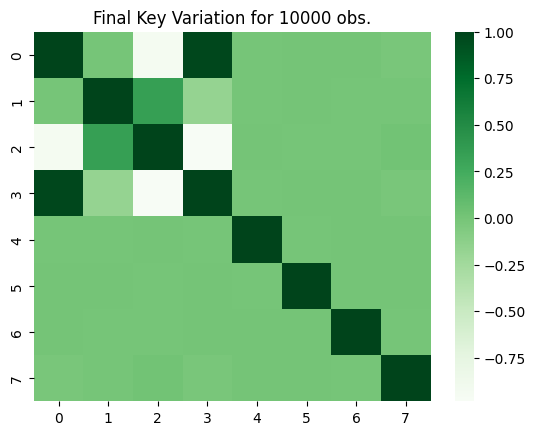

22/22 => 100.00%


In [4]:
x = KeyVariation(aes=128,order=4)
x.plot(RANGE)
var128 = float(x.variation)

### AES 192

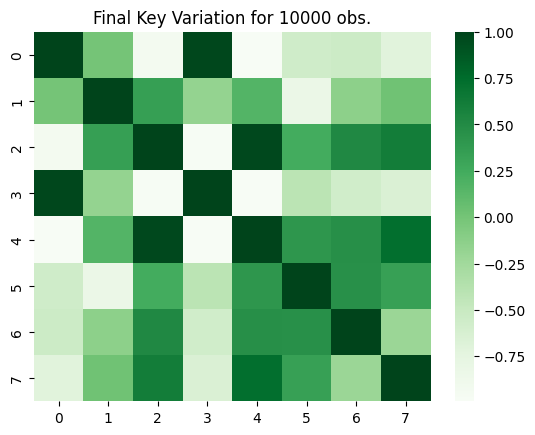

5/22 => 22.73%


In [5]:
x = KeyVariation(aes=192,order=4)
x.plot(RANGE)
var192 = float(x.variation)

### AES 256

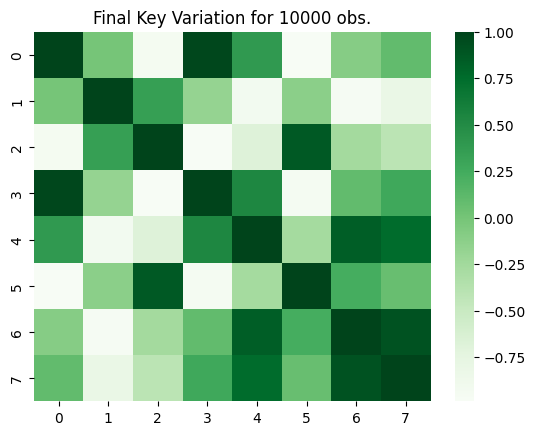

6/22 => 27.27%


In [6]:
x = KeyVariation(aes=256,order=4)
x.plot(RANGE)
var256 = float(x.variation)

### AES 512

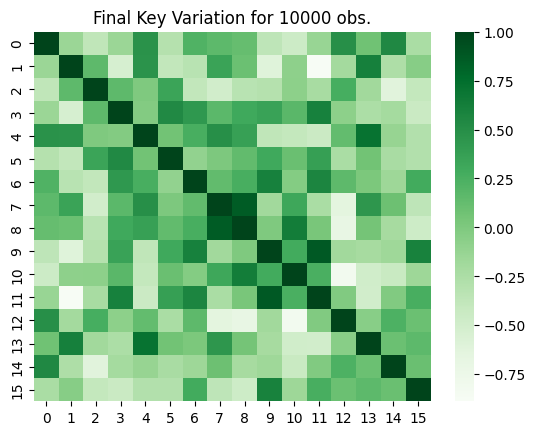

76/92 => 82.61%


In [7]:
x = KeyVariation(aes=512,order=8)
x.plot()
var512 = float(x.variation)

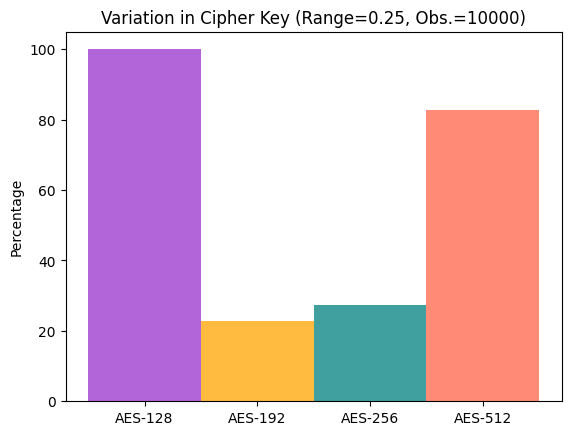

In [8]:
aes = ['AES-128', 'AES-192', 'AES-256', 'AES-512']
plt.bar( aes[0], var128, color=COLOR[0], width = 1, alpha=0.75)
plt.bar( aes[1], var192, color=COLOR[1], width = 1, alpha=0.75)
plt.bar( aes[2], var256, color=COLOR[2], width = 1, alpha=0.75)
plt.bar( aes[3], var512, color=COLOR[3], width = 1, alpha=0.75)
 
plt.ylabel("Percentage")
plt.title(f"Variation in Cipher Key (Range={RANGE}, Obs.={observation})")
plt.show()

## **📌 Observation**

- **Variation**: AES-128 > AES-512 > AES-192 ≈ AES-256